# [Installation](http://renom.jp/renomdl/ja/rsts/installation/main.html)

ReNomを使用するための準備として, 以下のステップを実行してください.
1. Python2.7もしくはPython3.4をインストール.
1. ReNomをインストール

最初にPythonをインストールする必要があります.ここではPythonをインストールする方法については説明しません.ReNomは以下のリンク(github)よりダウンロードすることができます.

URL: https://github.com/ReNom-dev-team/ReNom

Cuda ToolkitやcuDNNをインストールし, GPUを使用するための環境が整っている場合, 以下のコマンドを実行することでReNomをインストールできます.

```
git clone https://github.com/ReNom-dev-team/ReNom.git
cd ReNom
python setup.py build_ext -f -i
pip install -e .
```
CPU環境のみで実行する場合, 以下のコマンドを実行してください
```
git clone https://github.com/ReNom-dev-team/ReNom.git
cd ReNom
pip install -e .
```
**Requirements**

ReNom では以下のライブラリが必要です.
* Linux / Ubuntu
* Python 2.7, 3.4
* Numpy 1.13.0, 1.12.1 http://www.numpy.org/
* cuDNN 5.1 https://developer.nvidia.com/cudnn
* CUDA ToolKit 8.0 https://developer.nvidia.com/cuda-toolkit
* bottle 0.12.13 https://bottlepy.org/docs/dev/
* matplotlib 2.0.2 https://matplotlib.org
* networkx 1.11 https://networkx.github.io
* pandas 0.20.3 http://pandas.pydata.org
* scikit-learn 0.18.2 http://scikit-learn.org/stable/
* scipy https://www.scipy.org

In [1]:
# Google Colab でインストールされているパッケージの確認
# cuda, cuDNN は最初からインストール済だが、pip で確認できないのでインストールディレクトリを確認する
!python --version
!pip freeze | grep -E ^\(numpy\|bottle\|matplotlib\|networkx\|pandas\|scikit-learn\|scipy\)=
!ls -1 /usr/lib/x86_64-linux-gnu/libcuda*
!ls -1 /usr/lib64-nvidia/libcudnn*

Python 3.6.3
matplotlib==2.1.2
networkx==2.1
numpy==1.14.5
pandas==0.22.0
scikit-learn==0.19.2
scipy==0.19.1
/usr/lib/x86_64-linux-gnu/libcudart.so.8.0
/usr/lib/x86_64-linux-gnu/libcudart.so.8.0.61
/usr/lib64-nvidia/libcudnn.so
/usr/lib64-nvidia/libcudnn.so.6
/usr/lib64-nvidia/libcudnn.so.6.0.21


In [2]:
# 足りない分を追加インストールする
# Requirements に載っていないが、GPU使用時の setup.py の実行に cython が必要
!pip install bottle
!pip install cython

    100% |████████████████████████████████| 71kB 2.3MB/s 
  Running setup.py bdist_wheel for bottle ... - done
  Stored in directory: /content/.cache/pip/wheels/76/a0/b4/2a3ee1a32d0506931e558530258de1cc04b628eff1b2f008e0
Successfully built bottle
    100% |████████████████████████████████| 3.4MB 5.7MB/s 


In [3]:
# CUDA と cuDNN をインストールする。参考：https://qiita.com/yukoba/items/3692f1cb677b2383c983
#
# CUDA Toolkit 8.0 GA2 のインストール
# 元々入っている /usr/lib/x86_64-linux-gnu/libcudart.so.8.0.61 のバージョンに合わせている
%cd /content/
!apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
#!dpkg -i cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt install ./cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt update
!apt install cuda-8.0
!rm cuda-repo-ubuntu1604_8.0.61-1_amd64.deb

/content
Executing: /tmp/apt-key-gpghome.1IZRAL2IuL/gpg.1.sh --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
gpg: requesting key from 'http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub'
gpg: failed to start the dirmngr '/usr/bin/dirmngr': No such file or directory
gpg: connecting dirmngr at '/tmp/apt-key-gpghome.1IZRAL2IuL/S.dirmngr' failed: No such file or directory
gpg: WARNING: unable to fetch URI http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub: No dirmngr
--2018-07-27 01:04:27--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:443... connected.
HTTP request sent, awaiting resp

Reading package lists... Done
Building dependency tree       
Reading state information... Done
1 package can be upgraded. Run 'apt list --upgradable' to see it.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-8-0' for regex 'cuda-8.0'
Note, selecting 'libcuda-8.0-1' for regex 'cuda-8.0'
The following additional packages will be installed:
  accountsservice acpid activity-log-manager adwaita-icon-theme apg aspell
  aspell-en at-spi2-core avahi-daemon avahi-utils bbswitch-dkms bind9-host
  bluez bluez-obexd bsdmainutils ca-certificates-java cheese-common
  cracklib-runtime crda cuda-command-line-tools-8-0 cuda-core-8-0
  cuda-cublas-8-0 cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0
  cuda-cufft-8-0 cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0
  cuda-cusolver-8-0 cuda-cusolver-dev-8-0 cuda-cusparse-8-0
  cuda-cusparse-dev-8-0 cuda-demo-suite-8-0 cuda-documentation-8-0
  cuda-driver-dev-8-0 cuda-driv

Get:2 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-misc-headers-8-0 8.0.61-1 [1,077 kB]
Get:3 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-core-8-0 8.0.61-1 [20.0 MB]
Get:4 http://archive.ubuntu.com/ubuntu artful/main amd64 liblocale-gettext-perl amd64 1.07-3build2 [16.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu artful/main amd64 keyboard-configuration all 1.166ubuntu7 [622 kB]
Get:6 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-cudart-8-0 8.0.61-1 [135 kB]
Get:7 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-driver-dev-8-0 8.0.61-1 [14.1 kB]
Get:8 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-cudart-dev-8-0 8.0.61-1 [1,071 kB]
Get:9 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-command-line-tools-8-0 8.0.61-1 [26.1 MB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/main amd6

Get:82 http://archive.ubuntu.com/ubuntu artful/main amd64 libproxy1v5 amd64 0.4.14-3 [50.8 kB]
Get:83 http://archive.ubuntu.com/ubuntu artful/main amd64 glib-networking-common all 2.54.0-1 [2,960 B]
Get:84 http://archive.ubuntu.com/ubuntu artful/main amd64 glib-networking-services amd64 2.54.0-1 [8,096 B]
Get:85 http://archive.ubuntu.com/ubuntu artful/main amd64 gsettings-desktop-schemas all 3.24.1-1ubuntu1 [27.6 kB]
Get:86 http://archive.ubuntu.com/ubuntu artful/main amd64 glib-networking amd64 2.54.0-1 [52.0 kB]
Get:87 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libsoup2.4-1 amd64 2.60.1-1ubuntu0.1 [289 kB]
Get:88 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-cublas-8-0 8.0.61.2-1 [58.1 MB]
Get:89 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libsoup-gnome2.4-1 amd64 2.60.1-1ubuntu0.1 [5,020 B]
Get:90 http://archive.ubuntu.com/ubuntu artful/main amd64 librest-0.7-0 amd64 0.8.0-2 [31.8 kB]
Get:91 http://archive.ubuntu.com/u

Get:122 http://archive.ubuntu.com/ubuntu artful/main amd64 libxinerama1 amd64 2:1.1.3-1 [7,908 B]
Get:123 http://archive.ubuntu.com/ubuntu artful/main amd64 libxrandr2 amd64 2:1.5.1-1 [18.1 kB]
Get:124 http://archive.ubuntu.com/ubuntu artful/main amd64 hicolor-icon-theme all 0.17-1 [10.3 kB]
Get:125 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gtk-update-icon-cache amd64 3.22.25-0ubuntu0.1 [27.6 kB]
Get:126 http://archive.ubuntu.com/ubuntu artful/main amd64 libcroco3 amd64 0.6.12-1 [81.3 kB]
Get:127 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-cufft-8-0 8.0.61-1 [117 MB]
Get:128 http://archive.ubuntu.com/ubuntu artful/main amd64 librsvg2-2 amd64 2.40.18-1 [95.2 kB]
Get:129 http://archive.ubuntu.com/ubuntu artful/main amd64 librsvg2-common amd64 2.40.18-1 [5,106 B]
Get:130 http://archive.ubuntu.com/ubuntu artful/main amd64 humanity-icon-theme all 0.6.13 [1,288 kB]
Get:131 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 ubuntu-m

Get:163 http://archive.ubuntu.com/ubuntu artful/main amd64 python-talloc amd64 2.1.9-2ubuntu1 [9,050 B]
Get:164 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 samba-libs amd64 2:4.6.7+dfsg-1ubuntu3.2 [5,195 kB]
Get:165 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libsmbclient amd64 2:4.6.7+dfsg-1ubuntu3.2 [54.2 kB]
Get:166 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 distro-info-data all 0.36ubuntu0.2 [4,418 B]
Get:167 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-curand-8-0 8.0.61-1 [43.7 MB]
Get:168 http://archive.ubuntu.com/ubuntu artful/main amd64 dmsetup amd64 2:1.02.137-2ubuntu3 [71.9 kB]
Get:169 http://archive.ubuntu.com/ubuntu artful/main amd64 eject amd64 2.1.5+deb1+cvs20081104-13.2 [22.8 kB]
Get:170 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libmagic-mgc amd64 1:5.32-1ubuntu0.1 [184 kB]
Get:171 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libmagic1 amd64 1:5.32-1ubuntu0.1 [

Get:204 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-npp-8-0 8.0.61-1 [157 MB]
Get:205 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libbind9-140 amd64 1:9.10.3.dfsg.P4-12.6ubuntu1.1 [23.9 kB]
Get:206 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 liblwres141 amd64 1:9.10.3.dfsg.P4-12.6ubuntu1.1 [34.5 kB]
Get:207 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 bind9-host amd64 1:9.10.3.dfsg.P4-12.6ubuntu1.1 [50.1 kB]
Get:208 http://archive.ubuntu.com/ubuntu artful/main amd64 dosfstools amd64 4.1-1 [58.1 kB]
Get:209 http://archive.ubuntu.com/ubuntu artful/main amd64 geoip-database all 20170912-1 [2,225 kB]
Get:210 http://archive.ubuntu.com/ubuntu artful/main amd64 gettext-base amd64 0.19.8.1-4ubuntu1 [49.4 kB]
Get:211 http://archive.ubuntu.com/ubuntu artful/main amd64 libgirepository-1.0-1 amd64 1.54.1-1 [82.1 kB]
Get:212 http://archive.ubuntu.com/ubuntu artful/main amd64 gir1.2-glib-2.0 amd64 1.54.1-1 [131 kB]
Get:2

Get:239 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libxapian30 amd64 1.4.4-2ubuntu0.1 [628 kB]
Get:240 http://archive.ubuntu.com/ubuntu artful/main amd64 zeitgeist-core amd64 1.0-0ubuntu4 [134 kB]
Get:241 http://archive.ubuntu.com/ubuntu artful/main amd64 libwhoopsie0 amd64 0.2.58 [9,502 B]
Get:242 http://archive.ubuntu.com/ubuntu artful/main amd64 whoopsie-preferences amd64 0.19 [8,728 B]
Get:243 http://archive.ubuntu.com/ubuntu artful/universe amd64 activity-log-manager amd64 0.9.7-0ubuntu26 [93.8 kB]
Get:244 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  cuda-samples-8-0 8.0.61-1 [101 MB]
Get:245 http://archive.ubuntu.com/ubuntu artful/main amd64 apg amd64 2.2.3.dfsg.1-4 [50.2 kB]
Get:246 http://archive.ubuntu.com/ubuntu artful/main amd64 libaspell15 amd64 0.60.7~20110707-4 [309 kB]
Get:247 http://archive.ubuntu.com/ubuntu artful/main amd64 emacsen-common all 2.0.8 [17.6 kB]
Get:248 http://archive.ubuntu.com/ubuntu artful/main amd64 dictio

Get:274 http://archive.ubuntu.com/ubuntu artful/main amd64 libnl-3-200 amd64 3.2.29-0ubuntu3 [52.8 kB]
Get:275 http://archive.ubuntu.com/ubuntu artful/main amd64 libnl-genl-3-200 amd64 3.2.29-0ubuntu3 [11.2 kB]
Get:276 http://archive.ubuntu.com/ubuntu artful/main amd64 wireless-regdb all 2016.06.10-0ubuntu1 [8,824 B]
Get:277 http://archive.ubuntu.com/ubuntu artful/main amd64 iw amd64 4.9-0.1 [70.4 kB]
Get:278 http://archive.ubuntu.com/ubuntu artful/main amd64 crda amd64 3.18-0ubuntu1 [63.4 kB]
Get:279 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-glx0 amd64 1.12-1ubuntu1 [22.3 kB]
Get:280 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgl1-mesa-glx amd64 17.2.8-0ubuntu0~17.10.1 [130 kB]
Get:281 http://archive.ubuntu.com/ubuntu artful/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:282 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-dev amd64 2.4.83-1 [234 kB]
Get:283 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 mesa-common-dev amd6

Get:312 http://archive.ubuntu.com/ubuntu artful/main amd64 libxt6 amd64 1:1.1.5-1 [160 kB]
Get:313 http://archive.ubuntu.com/ubuntu artful/main amd64 libice-dev amd64 2:1.0.9-2 [46.8 kB]
Get:314 http://archive.ubuntu.com/ubuntu artful/main amd64 libsm-dev amd64 2:1.2.2-1 [16.2 kB]
Get:315 http://archive.ubuntu.com/ubuntu artful/main amd64 libxt-dev amd64 1:1.1.5-1 [395 kB]
Get:316 http://archive.ubuntu.com/ubuntu artful/universe amd64 freeglut3-dev amd64 2.8.1-3 [124 kB]
Get:317 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmu6 amd64 2:1.1.2-2 [46.0 kB]
Get:318 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmu-headers all 2:1.1.2-2 [54.3 kB]
Get:319 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmu-dev amd64 2:1.1.2-2 [49.0 kB]
Get:320 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  nvidia-396-dev 396.37-0ubuntu1 [81.7 kB]
Get:321 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  libcuda1-396 396.37-0ubuntu1 [

Get:349 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 openjdk-8-jre amd64 8u171-b11-0ubuntu0.17.10.1 [69.7 kB]
Get:350 http://archive.ubuntu.com/ubuntu artful/main amd64 default-jre amd64 2:1.8-59ubuntu1 [982 B]
Get:351 http://archive.ubuntu.com/ubuntu artful/main amd64 dkms all 2.3-3ubuntu3 [68.3 kB]
Get:352 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libc6-i386 amd64 2.26-0ubuntu2.1 [2,638 kB]
Get:353 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 lib32gcc1 amd64 1:7.2.0-8ubuntu3.2 [46.8 kB]
Get:354 http://archive.ubuntu.com/ubuntu artful/main amd64 libxkbfile1 amd64 1:1.0.9-2 [64.6 kB]
Get:355 http://archive.ubuntu.com/ubuntu artful/main amd64 x11-xkb-utils amd64 7.7+3 [158 kB]
Get:356 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-common all 2:1.19.5-0ubuntu2 [26.9 kB]
Get:357 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-legacy amd64 2:1.19.5-0ubuntu2 [35.0 kB]
Get:358 http://archive.ubuntu.com/ubuntu artful-upd

Get:389 http://archive.ubuntu.com/ubuntu artful/main amd64 libedata-book-1.2-25 amd64 3.26.1-1ubuntu1 [202 kB]
Get:390 http://archive.ubuntu.com/ubuntu artful/main amd64 libebook-1.2-19 amd64 3.26.1-1ubuntu1 [73.4 kB]
Get:391 http://archive.ubuntu.com/ubuntu artful/main amd64 libecal-1.2-19 amd64 3.26.1-1ubuntu1 [122 kB]
Get:392 http://archive.ubuntu.com/ubuntu artful/main amd64 libedata-cal-1.2-28 amd64 3.26.1-1ubuntu1 [128 kB]
Get:393 http://archive.ubuntu.com/ubuntu artful/main amd64 libgck-1-0 amd64 3.20.0-5.1ubuntu1 [74.1 kB]
Get:394 http://archive.ubuntu.com/ubuntu artful/main amd64 libgcr-3-common all 3.20.0-5.1ubuntu1 [5,744 B]
Get:395 http://archive.ubuntu.com/ubuntu artful/main amd64 libgcr-base-3-1 amd64 3.20.0-5.1ubuntu1 [185 kB]
Get:396 http://archive.ubuntu.com/ubuntu artful/main amd64 libgcr-ui-3-1 amd64 3.20.0-5.1ubuntu1 [141 kB]
Get:397 http://archive.ubuntu.com/ubuntu artful/main amd64 libgoa-1.0-common all 3.26.1-1ubuntu1 [5,426 B]
Get:398 http://archive.ubuntu.com/u

Get:430 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gir1.2-packagekitglib-1.0 amd64 1.1.7-1ubuntu0.1 [21.6 kB]
Get:431 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gir1.2-polkit-1.0 amd64 0.105-18ubuntu0.1 [7,258 B]
Get:432 http://archive.ubuntu.com/ubuntu artful/main amd64 gir1.2-secret-1 amd64 0.18.5-3.1ubuntu2 [7,214 B]
Get:433 http://archive.ubuntu.com/ubuntu artful/main amd64 libgnomekbd-common all 3.26.0-2 [6,088 B]
Get:434 http://archive.ubuntu.com/ubuntu artful/main amd64 libxklavier16 amd64 5.4-2 [43.2 kB]
Get:435 http://archive.ubuntu.com/ubuntu artful/main amd64 libgnomekbd8 amd64 3.26.0-2 [44.2 kB]
Get:436 http://archive.ubuntu.com/ubuntu artful/main amd64 gkbd-capplet amd64 3.26.0-2 [4,902 B]
Get:437 http://archive.ubuntu.com/ubuntu artful/main amd64 libltdl7 amd64 2.4.6-2 [38.8 kB]
Get:438 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libvorbisfile3 amd64 1.3.5-4ubuntu0.2 [15.9 kB]
Get:439 http://archive.ubuntu.com/ubuntu artful/m

Get:467 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libinput-bin amd64 1.8.4-0ubuntu0.17.10.1 [9,778 B]
Get:468 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libinput10 amd64 1.8.4-0ubuntu0.17.10.1 [78.4 kB]
Get:469 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-1.0-0 amd64 1.26.2+dfsg-3ubuntu1 [543 kB]
Get:470 http://archive.ubuntu.com/ubuntu artful/main amd64 libgstreamer1.0-0 amd64 1.12.3-1 [818 kB]
Get:471 http://archive.ubuntu.com/ubuntu artful/main amd64 liborc-0.4-0 amd64 1:0.4.27-1 [138 kB]
Get:472 http://archive.ubuntu.com/ubuntu artful/main amd64 libgstreamer-plugins-base1.0-0 amd64 1.12.3-1 [654 kB]
Get:473 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-gst-3.0-0 amd64 3.0.24-1 [54.3 kB]
Get:474 http://archive.ubuntu.com/ubuntu artful/main amd64 gstreamer1.0-clutter-3.0 amd64 3.0.24-1 [6,032 B]
Get:475 http://archive.ubuntu.com/ubuntu artful/main amd64 libopus0 amd64 1.1.2-1ubuntu1 [159 kB]
Get:476 http://archive.ubun

Get:505 http://archive.ubuntu.com/ubuntu artful/main amd64 libcdio13 amd64 0.83-4.2ubuntu1 [53.0 kB]
Get:506 http://archive.ubuntu.com/ubuntu artful/main amd64 libcdio-cdda1 amd64 0.83-4.2ubuntu1 [15.7 kB]
Get:507 http://archive.ubuntu.com/ubuntu artful/main amd64 libcdio-paranoia1 amd64 0.83-4.2ubuntu1 [15.4 kB]
Get:508 http://archive.ubuntu.com/ubuntu artful/main amd64 libexif12 amd64 0.6.21-2.1 [77.5 kB]
Get:509 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebp6 amd64 0.6.0-3 [181 kB]
Get:510 http://archive.ubuntu.com/ubuntu artful/main amd64 libgd3 amd64 2.2.5-3 [119 kB]
Get:511 http://archive.ubuntu.com/ubuntu artful/main amd64 libgphoto2-port12 amd64 2.5.14-1 [63.9 kB]
Get:512 http://archive.ubuntu.com/ubuntu artful/main amd64 libgphoto2-6 amd64 2.5.14-1 [827 kB]
Get:513 http://archive.ubuntu.com/ubuntu artful/main amd64 gvfs-backends amd64 1.34.1-1ubuntu1 [323 kB]
Get:514 http://archive.ubuntu.com/ubuntu artful/main amd64 ibus amd64 1.5.14-2ubuntu1 [214 kB]
Get:515 http

Get:545 http://archive.ubuntu.com/ubuntu artful/main amd64 libcheese8 amd64 3.26.0-0ubuntu1 [32.4 kB]
Get:546 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-gtk-1.0-0 amd64 1.8.4-2 [26.0 kB]
Get:547 http://archive.ubuntu.com/ubuntu artful/main amd64 libcheese-gtk25 amd64 3.26.0-0ubuntu1 [26.3 kB]
Get:548 http://archive.ubuntu.com/ubuntu artful/main amd64 libclutter-1.0-common all 1.26.2+dfsg-3ubuntu1 [3,810 B]
Get:549 http://archive.ubuntu.com/ubuntu artful/main amd64 libcogl-common all 1.22.2-2 [174 kB]
Get:550 http://archive.ubuntu.com/ubuntu artful/universe amd64 libfcitx-config4 amd64 1:4.2.9.1-6 [33.5 kB]
Get:551 http://archive.ubuntu.com/ubuntu artful/main amd64 libgail18 amd64 2.24.31-2ubuntu1 [14.1 kB]
Get:552 http://archive.ubuntu.com/ubuntu artful/main amd64 libgail-common amd64 2.24.31-2ubuntu1 [112 kB]
Get:553 http://archive.ubuntu.com/ubuntu artful/universe amd64 libgeonames-common all 0.2+17.04.20170220-0ubuntu1 [2,966 B]
Get:554 http://archive.ubuntu.com/u

Get:585 http://archive.ubuntu.com/ubuntu artful/main amd64 libxslt1.1 amd64 1.1.29-2.1ubuntu1 [149 kB]
Get:586 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwebkit2gtk-4.0-37 amd64 2.20.3-0ubuntu0.17.10.1 [10.7 MB]
Get:587 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libxatracker2 amd64 17.2.8-0ubuntu0~17.10.1 [1,078 kB]
Get:588 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libxfont1 amd64 1:1.5.2-4ubuntu1.1 [94.6 kB]
Get:589 http://archive.ubuntu.com/ubuntu artful/main amd64 libxvmc1 amd64 2:1.0.10-1 [13.7 kB]
Get:590 http://archive.ubuntu.com/ubuntu artful/main amd64 libyelp0 amd64 3.26.0-1ubuntu1 [93.9 kB]
Get:591 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 linux-headers-4.13.0-46 all 4.13.0-46.51 [10.9 MB]
Get:592 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 linux-headers-4.13.0-46-generic amd64 4.13.0-46.51 [704 kB]
Get:593 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 linux-headers-generic amd64 

Get:626 http://archive.ubuntu.com/ubuntu artful/universe amd64 unity-settings-daemon amd64 15.04.1+17.10.20171003-0ubuntu1 [450 kB]
Get:627 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-bluetooth amd64 0.0.6+17.10.20170605-0ubuntu3 [33.8 kB]
Get:628 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-sound amd64 12.10.2+17.10.20170829.1-0ubuntu1 [96.4 kB]
Get:629 http://archive.ubuntu.com/ubuntu artful/universe amd64 unity-control-center amd64 15.04.0+17.10.20170930-0ubuntu1 [861 kB]
Get:630 http://archive.ubuntu.com/ubuntu artful/universe amd64 unity-greeter amd64 17.10.0-0ubuntu1 [228 kB]
Get:631 http://archive.ubuntu.com/ubuntu artful/main amd64 usbmuxd amd64 1.1.0-2build1 [34.0 kB]
Get:632 http://archive.ubuntu.com/ubuntu artful/main amd64 vdpau-driver-all amd64 1.1.1-3ubuntu1 [4,674 B]
Get:633 http://archive.ubuntu.com/ubuntu artful/main amd64 wamerican all 2017.01.22-1 [207 kB]
Get:634 http://archive.ubuntu.com/ubuntu artful/main amd64 xfonts-encod

Extracting templates from packages: 100%
Preconfiguring packages ...

78Selecting previously unselected package liblocale-gettext-perl.
(Reading database ... 18399 files and directories currently installed.)
Preparing to unpack .../0-liblocale-gettext-perl_1.07-3build2_amd64.deb ...
7Progress: [  0%] [..........................................................] 8Unpacking liblocale-gettext-perl (1.07-3build2) ...
Selecting previously unselected package keyboard-configuration.
Preparing to unpack .../1-keyboard-configuration_1.166ubuntu7_all.deb ...
Unpacking keyboard-configuration (1.166ubuntu7) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../2-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libcap2:amd64.
Preparing to unpack .../3-libcap2_1%3a2.25-1.1_amd64.deb ...
Unpacking libcap2:amd64 (1:2.25-1.1) ...
Selecting previously unselected package libdevm

Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package ntfs-3g.
(Reading database ... 19809 files and directories currently installed.)
Preparing to unpack .../000-ntfs-3g_1%3a2016.2.22AR.2-2_amd64.deb ...
Unpacking ntfs-3g (1:2016.2.22AR.2-2) ...
Selecting previously unselected package fontconfig.
Preparing to unpack .../001-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libdbusmenu-glib4:amd64.
Preparing to unpack .../002-libdbusmenu-glib4_16.04.1+17.04.20170109.1-0ubuntu1_amd64.deb ...
Unpacking libdbusmenu-glib4:amd64 (16.04.1+17.04.20170109.1-0ubuntu1) ...
Selecting previously unselected package libatk1.0-data.
Preparing to unpack .../003-libatk1.0-data_2.26.0-2ubuntu1_all.deb ...
Unpacking libatk1.0-data (2.26.0-2ubuntu1) ...
Selecting previously unselected package libatk1.0-0:amd64.
Preparing to unpack .../004-libatk1.0-0_2.26.0-2ubu

Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../029-libavahi-common-data_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../030-libavahi-common3_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libavahi-client3:amd64.
Preparing to unpack .../031-libavahi-client3_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-client3:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../032-libcups2_2.2.4-7ubuntu3.1_amd64.deb ...
Unpacking libcups2:amd64 (2.2.4-7ubuntu3.1) ...
Selecting previously unselected package libepoxy0:amd64.
Preparing to unpack .../033-libepoxy0_1.3.1-3_amd64.deb ...
Unpacking libepoxy0:amd64 (1.3.1-3) ...
Selecting previously unselected package libjson-glib-1.0-common.


Selecting previously unselected package libsoup-gnome2.4-1:amd64.
Preparing to unpack .../056-libsoup-gnome2.4-1_2.60.1-1ubuntu0.1_amd64.deb ...
Unpacking libsoup-gnome2.4-1:amd64 (2.60.1-1ubuntu0.1) ...
Selecting previously unselected package librest-0.7-0:amd64.
Preparing to unpack .../057-librest-0.7-0_0.8.0-2_amd64.deb ...
Unpacking librest-0.7-0:amd64 (0.8.0-2) ...
Selecting previously unselected package libwayland-client0:amd64.
Preparing to unpack .../058-libwayland-client0_1.14.0-1ubuntu0.1_amd64.deb ...
Unpacking libwayland-client0:amd64 (1.14.0-1ubuntu0.1) ...
Selecting previously unselected package libwayland-cursor0:amd64.
Preparing to unpack .../059-libwayland-cursor0_1.14.0-1ubuntu0.1_amd64.deb ...
Unpacking libwayland-cursor0:amd64 (1.14.0-1ubuntu0.1) ...
Selecting previously unselected package libdrm-common.
Preparing to unpack .../060-libdrm-common_2.4.83-1_all.deb ...
Unpacking libdrm-common (2.4.83-1) ...
Selecting previously unselected package libdrm2:amd64.
Prepari

Unpacking libxcomposite1:amd64 (1:0.4.4-2) ...
7Progress: [ 10%] [#####.....................................................] 8Selecting previously unselected package libxfixes3:amd64.
Preparing to unpack .../084-libxfixes3_1%3a5.0.3-1_amd64.deb ...
Unpacking libxfixes3:amd64 (1:5.0.3-1) ...
Selecting previously unselected package libxcursor1:amd64.
Preparing to unpack .../085-libxcursor1_1%3a1.1.14-3ubuntu0.1_amd64.deb ...
Unpacking libxcursor1:amd64 (1:1.1.14-3ubuntu0.1) ...
Selecting previously unselected package libxdamage1:amd64.
Preparing to unpack .../086-libxdamage1_1%3a1.1.4-3_amd64.deb ...
Unpacking libxdamage1:amd64 (1:1.1.4-3) ...
Selecting previously unselected package libxi6:amd64.
Preparing to unpack .../087-libxi6_2%3a1.7.9-1_amd64.deb ...
Unpacking libxi6:amd64 (2:1.7.9-1) ...
Selecting previously unselected package libxinerama1:amd64.
Preparing to unpack .../088-libxinerama1_2%3a1.1.3-1_amd64.deb ...
Unpacking libxinerama1:amd64 (2:1.1.3-1) ...
Selecting previously 

Selecting previously unselected package libshout3:amd64.
Preparing to unpack .../112-libshout3_2.3.1-3_amd64.deb ...
Unpacking libshout3:amd64 (2.3.1-3) ...
Selecting previously unselected package libstemmer0d:amd64.
Preparing to unpack .../113-libstemmer0d_0+svn585-1_amd64.deb ...
Unpacking libstemmer0d:amd64 (0+svn585-1) ...
Selecting previously unselected package libwbclient0:amd64.
Preparing to unpack .../114-libwbclient0_2%3a4.6.7+dfsg-1ubuntu3.2_amd64.deb ...
Unpacking libwbclient0:amd64 (2:4.6.7+dfsg-1ubuntu3.2) ...
Selecting previously unselected package libxxf86dga1:amd64.
Preparing to unpack .../115-libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1.1.4-1) ...
Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../116-libxxf86vm1_1%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86vm1:amd64 (1:1.1.4-1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../117-dbus_1.10.22-1ubuntu1_amd64.deb ...
7Progress: [ 13%] [

Selecting previously unselected package libdns-export162.
Preparing to unpack .../139-libdns-export162_1%3a9.10.3.dfsg.P4-12.6ubuntu1.1_amd64.deb ...
7Progress: [ 15%] [########..................................................] 8Unpacking libdns-export162 (1:9.10.3.dfsg.P4-12.6ubuntu1.1) ...
Selecting previously unselected package isc-dhcp-client.
Preparing to unpack .../140-isc-dhcp-client_4.3.5-3ubuntu2.3_amd64.deb ...
Unpacking isc-dhcp-client (4.3.5-3ubuntu2.3) ...
Selecting previously unselected package isc-dhcp-common.
Preparing to unpack .../141-isc-dhcp-common_4.3.5-3ubuntu2.3_amd64.deb ...
Unpacking isc-dhcp-common (4.3.5-3ubuntu2.3) ...
Selecting previously unselected package kmod.
Preparing to unpack .../142-kmod_24-1ubuntu2_amd64.deb ...
Unpacking kmod (24-1ubuntu2) ...
Selecting previously unselected package libatm1:amd64.
Preparing to unpack .../143-libatm1_1%3a2.5.1-2_amd64.deb ...
Unpacking libatm1:amd64 (1:2.5.1-2) ...
Selecting previously unselected package libcap2

Selecting previously unselected package dosfstools.
Preparing to unpack .../167-dosfstools_4.1-1_amd64.deb ...
Unpacking dosfstools (4.1-1) ...
Selecting previously unselected package geoip-database.
Preparing to unpack .../168-geoip-database_20170912-1_all.deb ...
Unpacking geoip-database (20170912-1) ...
Selecting previously unselected package gettext-base.
Preparing to unpack .../169-gettext-base_0.19.8.1-4ubuntu1_amd64.deb ...
Unpacking gettext-base (0.19.8.1-4ubuntu1) ...
Selecting previously unselected package libgirepository-1.0-1:amd64.
Preparing to unpack .../170-libgirepository-1.0-1_1.54.1-1_amd64.deb ...
Unpacking libgirepository-1.0-1:amd64 (1.54.1-1) ...
Selecting previously unselected package gir1.2-glib-2.0:amd64.
Preparing to unpack .../171-gir1.2-glib-2.0_1.54.1-1_amd64.deb ...
Unpacking gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Selecting previously unselected package libip6tc0:amd64.
Preparing to unpack .../172-libip6tc0_1.6.1-2ubuntu1_amd64.deb ...
Unpacking libip6tc0:am

Selecting previously unselected package libzeitgeist-2.0-0:amd64.
Preparing to unpack .../195-libzeitgeist-2.0-0_1.0-0ubuntu4_amd64.deb ...
Unpacking libzeitgeist-2.0-0:amd64 (1.0-0ubuntu4) ...
Selecting previously unselected package libdee-1.0-4:amd64.
Preparing to unpack .../196-libdee-1.0-4_1.2.7+17.10.20170616-0ubuntu1_amd64.deb ...
Unpacking libdee-1.0-4:amd64 (1.2.7+17.10.20170616-0ubuntu1) ...
Selecting previously unselected package libxapian30:amd64.
Preparing to unpack .../197-libxapian30_1.4.4-2ubuntu0.1_amd64.deb ...
Unpacking libxapian30:amd64 (1.4.4-2ubuntu0.1) ...
Selecting previously unselected package zeitgeist-core.
Preparing to unpack .../198-zeitgeist-core_1.0-0ubuntu4_amd64.deb ...
Unpacking zeitgeist-core (1.0-0ubuntu4) ...
Selecting previously unselected package libwhoopsie0:amd64.
Preparing to unpack .../199-libwhoopsie0_0.2.58_amd64.deb ...
Unpacking libwhoopsie0:amd64 (0.2.58) ...
Selecting previously unselected package whoopsie-preferences.
Preparing to unpack

Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../222-ca-certificates-java_20170930_all.deb ...
Unpacking ca-certificates-java (20170930) ...
Selecting previously unselected package cheese-common.
Preparing to unpack .../223-cheese-common_3.26.0-0ubuntu1_all.deb ...
Unpacking cheese-common (3.26.0-0ubuntu1) ...
Selecting previously unselected package libcrack2:amd64.
Preparing to unpack .../224-libcrack2_2.9.2-5build1_amd64.deb ...
Unpacking libcrack2:amd64 (2.9.2-5build1) ...
Selecting previously unselected package cracklib-runtime.
Preparing to unpack .../225-cracklib-runtime_2.9.2-5build1_amd64.deb ...
Unpacking cracklib-runtime (2.9.2-5build1) ...
Selecting previously unselected package libnl-3-200:amd64.
Preparing to unpack .../226-libnl-3-200_3.2.29-0ubuntu3_amd64.deb ...
Unpacking libnl-3-200:amd64 (3.2.29-0ubuntu3) ...
Selecting previously unselected package libnl-genl-3-200:amd64.
Preparing to unpack .../227-libnl-genl-3-200_3.2.29-0ubuntu3_

Selecting previously unselected package libxcb-xfixes0-dev:amd64.
Preparing to unpack .../250-libxcb-xfixes0-dev_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-xfixes0-dev:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-sync-dev:amd64.
Preparing to unpack .../251-libxcb-sync-dev_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-sync-dev:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-present-dev:amd64.
Preparing to unpack .../252-libxcb-present-dev_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-present-dev:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxshmfence-dev:amd64.
Preparing to unpack .../253-libxshmfence-dev_1.2-1_amd64.deb ...
Unpacking libxshmfence-dev:amd64 (1.2-1) ...
Selecting previously unselected package libxcb-dri2-0-dev:amd64.
Preparing to unpack .../254-libxcb-dri2-0-dev_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-dri2-0-dev:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-glx0-de

Selecting previously unselected package cuda-nvrtc-dev-8-0.
Preparing to unpack .../279-cuda-nvrtc-dev-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-nvrtc-dev-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-cusolver-8-0.
Preparing to unpack .../280-cuda-cusolver-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-cusolver-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-cusolver-dev-8-0.
Preparing to unpack .../281-cuda-cusolver-dev-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-cusolver-dev-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-cublas-8-0.
Preparing to unpack .../282-cuda-cublas-8-0_8.0.61.2-1_amd64.deb ...
Unpacking cuda-cublas-8-0 (8.0.61.2-1) ...
Selecting previously unselected package cuda-cublas-dev-8-0.
Preparing to unpack .../283-cuda-cublas-dev-8-0_8.0.61.2-1_amd64.deb ...
7Progress: [ 28%] [################..........................................] 8Unpacking cuda-cublas-dev-8-0 (8.0.61.2-1) ...
Selecting previously unselected package 

Selecting previously unselected package libasound2:amd64.
Preparing to unpack .../307-libasound2_1.1.3-5_amd64.deb ...
Unpacking libasound2:amd64 (1.1.3-5) ...
Selecting previously unselected package libgif7:amd64.
Preparing to unpack .../308-libgif7_5.1.4-1_amd64.deb ...
Unpacking libgif7:amd64 (5.1.4-1) ...
Selecting previously unselected package libasyncns0:amd64.
Preparing to unpack .../309-libasyncns0_0.8-6_amd64.deb ...
Unpacking libasyncns0:amd64 (0.8-6) ...
Selecting previously unselected package libflac8:amd64.
Preparing to unpack .../310-libflac8_1.3.2-1_amd64.deb ...
Unpacking libflac8:amd64 (1.3.2-1) ...
Selecting previously unselected package libvorbisenc2:amd64.
Preparing to unpack .../311-libvorbisenc2_1.3.5-4ubuntu0.2_amd64.deb ...
Unpacking libvorbisenc2:amd64 (1.3.5-4ubuntu0.2) ...
Selecting previously unselected package libsndfile1:amd64.
Preparing to unpack .../312-libsndfile1_1.0.28-4_amd64.deb ...
Unpacking libsndfile1:amd64 (1.0.28-4) ...
Selecting previously uns

Selecting previously unselected package libpolkit-agent-1-0:amd64.
Preparing to unpack .../333-libpolkit-agent-1-0_0.105-18ubuntu0.1_amd64.deb ...
Unpacking libpolkit-agent-1-0:amd64 (0.105-18ubuntu0.1) ...
Selecting previously unselected package libpolkit-backend-1-0:amd64.
Preparing to unpack .../334-libpolkit-backend-1-0_0.105-18ubuntu0.1_amd64.deb ...
Unpacking libpolkit-backend-1-0:amd64 (0.105-18ubuntu0.1) ...
Selecting previously unselected package policykit-1.
Preparing to unpack .../335-policykit-1_0.105-18ubuntu0.1_amd64.deb ...
Unpacking policykit-1 (0.105-18ubuntu0.1) ...
Selecting previously unselected package policykit-1-gnome.
Preparing to unpack .../336-policykit-1-gnome_0.105-6ubuntu2_amd64.deb ...
Unpacking policykit-1-gnome (0.105-6ubuntu2) ...
Selecting previously unselected package screen-resolution-extra.
Preparing to unpack .../337-screen-resolution-extra_0.17.1.1_all.deb ...
Unpacking screen-resolution-extra (0.17.1.1) ...
Selecting previously unselected package

Selecting previously unselected package libedataserver-1.2-22:amd64.
Preparing to unpack .../362-libedataserver-1.2-22_3.26.1-1ubuntu1_amd64.deb ...
Unpacking libedataserver-1.2-22:amd64 (3.26.1-1ubuntu1) ...
Selecting previously unselected package libebackend-1.2-10:amd64.
Preparing to unpack .../363-libebackend-1.2-10_3.26.1-1ubuntu1_amd64.deb ...
Unpacking libebackend-1.2-10:amd64 (3.26.1-1ubuntu1) ...
Selecting previously unselected package libboost-thread1.62.0:amd64.
Preparing to unpack .../364-libboost-thread1.62.0_1.62.0+dfsg-4build3_amd64.deb ...
Unpacking libboost-thread1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Selecting previously unselected package libprotobuf10:amd64.
Preparing to unpack .../365-libprotobuf10_3.0.0-9ubuntu5_amd64.deb ...
Unpacking libprotobuf10:amd64 (3.0.0-9ubuntu5) ...
Selecting previously unselected package libphonenumber7:amd64.
Preparing to unpack .../366-libphonenumber7_7.1.0-5ubuntu2_amd64.deb ...
Unpacking libphonenumber7:amd64 (7.1.0-5ubuntu2) ...
Se

Selecting previously unselected package pinentry-gnome3.
Preparing to unpack .../387-pinentry-gnome3_1.0.0-2_amd64.deb ...
Unpacking pinentry-gnome3 (1.0.0-2) ...
Selecting previously unselected package gnome-keyring.
Preparing to unpack .../388-gnome-keyring_3.20.1-1ubuntu1_amd64.deb ...
Unpacking gnome-keyring (3.20.1-1ubuntu1) ...
Selecting previously unselected package evolution-data-server.
Preparing to unpack .../389-evolution-data-server_3.26.1-1ubuntu1_amd64.deb ...
Unpacking evolution-data-server (3.26.1-1ubuntu1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../390-libfakeroot_1.21-1ubuntu2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.21-1ubuntu2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../391-fakeroot_1.21-1ubuntu2_amd64.deb ...
Unpacking fakeroot (1.21-1ubuntu2) ...
Selecting previously unselected package fonts-dejavu-extra.
Preparing to unpack .../392-fonts-dejavu-extra_2.37-1_all.deb ...
Unpacking fo

7Progress: [ 40%] [#######################...................................] 8Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../416-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libvorbisfile3:amd64.
Preparing to unpack .../417-libvorbisfile3_1.3.5-4ubuntu0.2_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4ubuntu0.2) ...
Selecting previously unselected package sound-theme-freedesktop.
Preparing to unpack .../418-sound-theme-freedesktop_0.8-1ubuntu1_all.deb ...
Unpacking sound-theme-freedesktop (0.8-1ubuntu1) ...
Selecting previously unselected package libcanberra0:amd64.
Preparing to unpack .../419-libcanberra0_0.30-3ubuntu1_amd64.deb ...
Unpacking libcanberra0:amd64 (0.30-3ubuntu1) ...
Selecting previously unselected package libcanberra-gtk3-0:amd64.
Preparing to unpack .../420-libcanberra-gtk3-0_0.30-3ubuntu1_amd64.deb ...
Unpacking libcanberra-gtk3-0:amd64 (0.30-3ubuntu1) ...
Selec

Selecting previously unselected package libwacom-common.
Preparing to unpack .../444-libwacom-common_0.24-1_all.deb ...
Unpacking libwacom-common (0.24-1) ...
Selecting previously unselected package libwacom2:amd64.
Preparing to unpack .../445-libwacom2_0.24-1_amd64.deb ...
Unpacking libwacom2:amd64 (0.24-1) ...
Selecting previously unselected package libinput-bin.
Preparing to unpack .../446-libinput-bin_1.8.4-0ubuntu0.17.10.1_amd64.deb ...
Unpacking libinput-bin (1.8.4-0ubuntu0.17.10.1) ...
Selecting previously unselected package libinput10:amd64.
Preparing to unpack .../447-libinput10_1.8.4-0ubuntu0.17.10.1_amd64.deb ...
Unpacking libinput10:amd64 (1.8.4-0ubuntu0.17.10.1) ...
Selecting previously unselected package libclutter-1.0-0:amd64.
Preparing to unpack .../448-libclutter-1.0-0_1.26.2+dfsg-3ubuntu1_amd64.deb ...
Unpacking libclutter-1.0-0:amd64 (1.26.2+dfsg-3ubuntu1) ...
Selecting previously unselected package libgstreamer1.0-0:amd64.
Preparing to unpack .../449-libgstreamer1.0

Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../472-libwavpack1_5.1.0-2ubuntu0.3_amd64.deb ...
Unpacking libwavpack1:amd64 (5.1.0-2ubuntu0.3) ...
Selecting previously unselected package gstreamer1.0-plugins-good:amd64.
Preparing to unpack .../473-gstreamer1.0-plugins-good_1.12.3-1ubuntu1_amd64.deb ...
Unpacking gstreamer1.0-plugins-good:amd64 (1.12.3-1ubuntu1) ...
Selecting previously unselected package gstreamer1.0-x:amd64.
Preparing to unpack .../474-gstreamer1.0-x_1.12.3-1_amd64.deb ...
Unpacking gstreamer1.0-x:amd64 (1.12.3-1) ...
Selecting previously unselected package libudisks2-0:amd64.
Preparing to unpack .../475-libudisks2-0_2.6.5-2ubuntu2_amd64.deb ...
Unpacking libudisks2-0:amd64 (2.6.5-2ubuntu2) ...
Selecting previously unselected package libatasmart4:amd64.
Preparing to unpack .../476-libatasmart4_0.19-4_amd64.deb ...
Unpacking libatasmart4:amd64 (0.19-4) ...
Selecting previously unselected package udisks2.
Preparing to unpack .../477-udi

Unpacking indicator-applet (12.10.2+17.10.20170425-0ubuntu1) ...
Selecting previously unselected package indicator-common.
Preparing to unpack .../501-indicator-common_16.10.0+16.10.20160913-0ubuntu1_all.deb ...
Unpacking indicator-common (16.10.0+16.10.20160913-0ubuntu1) ...
Selecting previously unselected package indicator-application.
Preparing to unpack .../502-indicator-application_12.10.1+17.04.20161201-0ubuntu1_amd64.deb ...
Unpacking indicator-application (12.10.1+17.04.20161201-0ubuntu1) ...
Selecting previously unselected package libaccounts-glib0:amd64.
Preparing to unpack .../503-libaccounts-glib0_1.23+17.04.20161104-0ubuntu1_amd64.deb ...
Unpacking libaccounts-glib0:amd64 (1.23+17.04.20161104-0ubuntu1) ...
Selecting previously unselected package libmessaging-menu0:amd64.
Preparing to unpack .../504-libmessaging-menu0_13.10.1+17.04.20170120-0ubuntu2_amd64.deb ...
Unpacking libmessaging-menu0:amd64 (13.10.1+17.04.20170120-0ubuntu2) ...
7Progress: [ 48%] [###################

Selecting previously unselected package libclutter-gtk-1.0-0:amd64.
Preparing to unpack .../525-libclutter-gtk-1.0-0_1.8.4-2_amd64.deb ...
Unpacking libclutter-gtk-1.0-0:amd64 (1.8.4-2) ...
Selecting previously unselected package libcheese-gtk25:amd64.
Preparing to unpack .../526-libcheese-gtk25_3.26.0-0ubuntu1_amd64.deb ...
Unpacking libcheese-gtk25:amd64 (3.26.0-0ubuntu1) ...
7Progress: [ 50%] [#############################.............................] 8Selecting previously unselected package libclutter-1.0-common.
Preparing to unpack .../527-libclutter-1.0-common_1.26.2+dfsg-3ubuntu1_all.deb ...
Unpacking libclutter-1.0-common (1.26.2+dfsg-3ubuntu1) ...
Selecting previously unselected package libcogl-common.
Preparing to unpack .../528-libcogl-common_1.22.2-2_all.deb ...
Unpacking libcogl-common (1.22.2-2) ...
Selecting previously unselected package libfcitx-config4:amd64.
Preparing to unpack .../529-libfcitx-config4_1%3a4.2.9.1-6_amd64.deb ...
Unpacking libfcitx-config4:amd64 (1

Selecting previously unselected package libp11-kit-gnome-keyring:amd64.
Preparing to unpack .../552-libp11-kit-gnome-keyring_3.20.1-1ubuntu1_amd64.deb ...
Unpacking libp11-kit-gnome-keyring:amd64 (3.20.1-1ubuntu1) ...
Selecting previously unselected package libpam-gnome-keyring:amd64.
Preparing to unpack .../553-libpam-gnome-keyring_3.20.1-1ubuntu1_amd64.deb ...
Unpacking libpam-gnome-keyring:amd64 (3.20.1-1ubuntu1) ...
Selecting previously unselected package libpulse-mainloop-glib0:amd64.
Preparing to unpack .../554-libpulse-mainloop-glib0_1%3a10.0-2ubuntu3.1_amd64.deb ...
Unpacking libpulse-mainloop-glib0:amd64 (1:10.0-2ubuntu3.1) ...
Selecting previously unselected package libpwquality-common.
Preparing to unpack .../555-libpwquality-common_1.4.0-1_all.deb ...
Unpacking libpwquality-common (1.4.0-1) ...
Selecting previously unselected package libpwquality1:amd64.
Preparing to unpack .../556-libpwquality1_1.4.0-1_amd64.deb ...
Unpacking libpwquality1:amd64 (1.4.0-1) ...
Selecting pre

Unpacking wpasupplicant (2.4-0ubuntu10) ...
Selecting previously unselected package network-manager.
Preparing to unpack .../578-network-manager_1.8.4-1ubuntu3_amd64.deb ...
Unpacking network-manager (1.8.4-1ubuntu3) ...
Selecting previously unselected package network-manager-gnome.
Preparing to unpack .../579-network-manager-gnome_1.8.4-1ubuntu1_amd64.deb ...
Unpacking network-manager-gnome (1.8.4-1ubuntu1) ...
Selecting previously unselected package ppp.
Preparing to unpack .../580-ppp_2.4.7-1+2ubuntu1_amd64.deb ...
Unpacking ppp (2.4.7-1+2ubuntu1) ...
Selecting previously unselected package pptp-linux.
Preparing to unpack .../581-pptp-linux_1.9.0+ds-1_amd64.deb ...
Unpacking pptp-linux (1.9.0+ds-1) ...
7Progress: [ 55%] [###############################...........................] 8Selecting previously unselected package network-manager-pptp.
Preparing to unpack .../582-network-manager-pptp_1.2.4-4_amd64.deb ...
Unpacking network-manager-pptp (1.2.4-4) ...
Selecting previously unse

Selecting previously unselected package unity-settings-daemon.
Preparing to unpack .../605-unity-settings-daemon_15.04.1+17.10.20171003-0ubuntu1_amd64.deb ...
Unpacking unity-settings-daemon (15.04.1+17.10.20171003-0ubuntu1) ...
Selecting previously unselected package indicator-bluetooth.
Preparing to unpack .../606-indicator-bluetooth_0.0.6+17.10.20170605-0ubuntu3_amd64.deb ...
Unpacking indicator-bluetooth (0.0.6+17.10.20170605-0ubuntu3) ...
Selecting previously unselected package indicator-sound.
Preparing to unpack .../607-indicator-sound_12.10.2+17.10.20170829.1-0ubuntu1_amd64.deb ...
Unpacking indicator-sound (12.10.2+17.10.20170829.1-0ubuntu1) ...
Selecting previously unselected package unity-control-center.
Preparing to unpack .../608-unity-control-center_15.04.0+17.10.20170930-0ubuntu1_amd64.deb ...
Unpacking unity-control-center (15.04.0+17.10.20170930-0ubuntu1) ...
Selecting previously unselected package unity-greeter.
Preparing to unpack .../609-unity-greeter_17.10.0-0ubunt

Preparing to unpack .../631-yelp-xsl_3.20.1-2_all.deb ...
Unpacking yelp-xsl (3.20.1-2) ...
Selecting previously unselected package yelp.
Preparing to unpack .../632-yelp_3.26.0-1ubuntu1_amd64.deb ...
Unpacking yelp (3.26.0-1ubuntu1) ...
Selecting previously unselected package zenity-common.
Preparing to unpack .../633-zenity-common_3.24.0-1_all.deb ...
Unpacking zenity-common (3.24.0-1) ...
Selecting previously unselected package zenity.
Preparing to unpack .../634-zenity_3.24.0-1_amd64.deb ...
Unpacking zenity (3.24.0-1) ...
Selecting previously unselected package cups-pk-helper.
Preparing to unpack .../635-cups-pk-helper_0.2.6-1ubuntu1_amd64.deb ...
Unpacking cups-pk-helper (0.2.6-1ubuntu1) ...
Selecting previously unselected package gdisk.
Preparing to unpack .../636-gdisk_1.0.1-1build1_amd64.deb ...
Unpacking gdisk (1.0.1-1build1) ...
Selecting previously unselected package ippusbxd.
Preparing to unpack .../637-ippusbxd_1.31-0ubuntu1_amd64.deb ...
7Progress: [ 60%] [#############

Setting up iso-codes (3.75-1) ...
Setting up libhunspell-1.6-0:amd64 (1.6.2-1) ...
Setting up libaccounts-glib0:amd64 (1.23+17.04.20161104-0ubuntu1) ...
Setting up libwavpack1:amd64 (5.1.0-2ubuntu0.3) ...
Setting up liblcms2-2:amd64 (2.7-1ubuntu1) ...
Setting up isc-dhcp-common (4.3.5-3ubuntu2.3) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libpcsclite1:amd64 (1.8.22-1ubuntu1) ...
Setting up libgpm2:amd64 (1.20.4-6.2) ...
Setting up libaspell15:amd64 (0.60.7~20110707-4) ...
Setting up libgee-0.8-2:amd64 (0.20.0-1) ...
Setting up libcap2-bin (1:2.25-1.1) ...
Setting up libwhoopsie-preferences0 (0.19) ...
Setting up libjson-c3:amd64 (0.12.1-1.2) ...
7Progress: [ 64%] [#####################################.....................] 8Setting up libgtop2-common (2.38.0-1) ...
Setting up systemd-sysv (234-2ubuntu12.4) ...
Setting up libv4lconvert0:amd64 (1.12.5-1) ...
Setting up libelf1:amd64 (0.170-0.1) ...
Setting up libxmu-headers (2:1.1.2-2) ...
Setting up groff-base (1.22.3-9) .

Setting up libxtst6:amd64 (2:1.2.3-1) ...
Setting up libmagic-mgc (1:5.32-1ubuntu0.1) ...
Setting up libasound2:amd64 (1.1.3-5) ...
Setting up cuda-license-8-0 (8.0.61-1) ...
*** LICENSE AGREEMENT ***
By using this software you agree to fully comply with the terms and 
conditions of the EULA (End User License Agreement). The EULA is located
at /usr/local/cuda-8.0/doc/EULA.txt. The EULA can also be found at
http://docs.nvidia.com/cuda/eula/index.html. If you do not agree to the
terms and conditions of the EULA, do not use the software.

Setting up gnome-control-center-faces (1:3.26.2-0ubuntu0.2) ...
Setting up libmagic1:amd64 (1:5.32-1ubuntu0.1) ...
Setting up libdrm-common (2.4.83-1) ...
Setting up libjson-glib-1.0-0:amd64 (1.2.8-1) ...
Setting up libgcr-3-common (3.20.0-5.1ubuntu1) ...
Setting up libgraphite2-3:amd64 (1.3.10-2) ...
Setting up usb-modeswitch-data (20170806-1) ...
Setting up libcroco3:amd64 (0.6.12-1) ...
Setting up libxcb-sync1:amd64 (1.12-1ubuntu1) ...
Setting up linu

7Progress: [ 72%] [#########################################.................] 8Setting up liblwres141:amd64 (1:9.10.3.dfsg.P4-12.6ubuntu1.1) ...
Setting up libmtp9:amd64 (1.1.13-1) ...
Setting up libmtdev1:amd64 (1.1.5-1ubuntu2) ...
Setting up libplymouth4:amd64 (0.9.2-3ubuntu20) ...
Setting up libupower-glib3:amd64 (0.99.6-1) ...
Setting up libavc1394-0:amd64 (0.5.4-4) ...
Setting up cuda-cufft-8-0 (8.0.61-1) ...
Setting up zenity-common (3.24.0-1) ...
Setting up libvisual-0.4-0:amd64 (0.4.0-10) ...
Setting up libfontenc1:amd64 (1:1.1.3-1) ...
Setting up libdconf1:amd64 (0.26.0-2) ...
Setting up libxcomposite1:amd64 (1:0.4.4-2) ...
Setting up libfribidi0:amd64 (0.19.7-1) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up liblocale-gettext-perl (1.07-3build2) ...
Setting up dmsetup (2:1.02.137-2ubuntu3) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
7Progress: [ 73%] [##########################################................] 8Setting up libcrack2:amd64 (2.9.2-5build1


bbswitch:
Running module version sanity check.
 - Original module
   - No original module exists within this kernel
 - Installation
   - Installing to /lib/modules/4.13.0-46-generic/updates/dkms/

depmod...

DKMS: install completed.
Setting up libtimezonemap-data (0.4.5) ...
Setting up libxnvctrl0 (396.37-0ubuntu1) ...
Setting up cuda-nvgraph-dev-8-0 (8.0.61-1) ...
Setting up libspeexdsp1:amd64 (1.2~rc1.2-1ubuntu1) ...
Setting up libxrandr2:amd64 (2:1.5.1-1) ...
Setting up libpolkit-gobject-1-0:amd64 (0.105-18ubuntu0.1) ...
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up libip6tc0:amd64 (1.6.1-2ubuntu1) ...
Setting up libboost-system1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Setting up libxcb-sync-dev:amd64 (1.12-1ubuntu1) ...
Setting up libdv4:amd64 (1.0.0-11) ...
Setting up libtag1v5-vanilla:amd64 (1.11.1+dfsg.1-0.2) ...
Setting up lib32gcc1 (1:7.2.0-8ubuntu3.2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up liblzo2-2:amd64 (

Setting up libcairo-gobject2:amd64 (1.14.10-1ubuntu1) ...
Setting up cuda-nvrtc-8-0 (8.0.61-1) ...
Setting up libflac8:amd64 (1.3.2-1) ...
Setting up pptp-linux (1.9.0+ds-1) ...
Setting up libgdk-pixbuf2.0-bin (2.36.11-1ubuntu0.1) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up gir1.2-gdkpixbuf-2.0:amd64 (2.36.11-1ubuntu0.1) ...
Setting up libnl-genl-3-200:amd64 (3.2.29-0ubuntu3) ...
Setting up whoopsie-preferences (0.19) ...
Setting up libnss3:amd64 (2:3.32-1ubuntu3) ...
Setting up libxfont2:amd64 (1:2.0.1-3ubuntu1.1) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
7Progress: [ 81%] [##############################################............] 8Setting up dconf-cli (0.26.0-2) ...
Setting up libfcitx-gclient0:amd64 (1:4.2.9.1-6) ...
Setting up cuda-nvrtc-dev-8-0 (8.0.61-1) ...
Setting up libthai0:amd64 (0.1.26-3) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up file (1:5.32-1ubuntu0.1) ...
Setting up fakeroot (1.21-1ubuntu2) ...
update-alternatives: using /usr/bin/faker

Setting up libtheora0:amd64 (1.1.1+dfsg.1-14) ...
Setting up libxfixes-dev:amd64 (1:5.0.3-1) ...
7Progress: [ 85%] [#################################################.........] 8Setting up bluez (5.46-0ubuntu3) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of force-reload.
Created symlink /etc/systemd/system/dbus-org.bluez.service → /lib/systemd/system/bluetooth.service.
Created symlink /etc/systemd/system/bluetooth.target.wants/bluetooth.service → /lib/systemd/system/bluetooth.service.
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libshout3:amd64 (2.3.1-3) ...
Setting up dconf-gsettings-backend:amd64 (0.26.0-2) ...
Setting up cuda-cublas-dev-8-0 (8.0.61.2-1) ...
Setting up cuda-cusparse-dev-8-0 (8.0.61-1) ...
Setting up hunspell-en-us (20070829-6ubuntu3) ...
Setting up cuda-command-line-tools-8-0 (8.0.61-1) ...
Setting up libavahi-core7:amd64 (0.6.32-1ubuntu1.1) ...
Se

Created symlink /etc/systemd/system/dbus-org.freedesktop.nm-dispatcher.service → /lib/systemd/system/NetworkManager-dispatcher.service.
Created symlink /etc/systemd/system/network-online.target.wants/NetworkManager-wait-online.service → /lib/systemd/system/NetworkManager-wait-online.service.
Created symlink /etc/systemd/system/multi-user.target.wants/NetworkManager.service → /lib/systemd/system/NetworkManager.service.
Setting up libgl1-mesa-glx:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /usr/lib/x86_64-linux-gnu/mesa/ld.so.conf to provide /etc/ld.so.conf.d/x86_64-linux-gnu_GL.conf (x86_64-linux-gnu_gl_conf) in auto mode
Setting up ubuntu-system-service (0.3) ...
Setting up glib-networking:amd64 (2.54.0-1) ...
7Progress: [ 89%] [###################################################.......] 8Setting up aspell-en (2017.08.24-0-0.1) ...
Setting up lightdm (1.24.0-0ubuntu1) ...
Adding group `lightdm' (GID 112) ...
Done.
Adding system user `lightdm' (UID 109) ...
Adding n

Setting up packagekit-tools (1.1.7-1ubuntu0.1) ...
Setting up gstreamer1.0-x:amd64 (1.12.3-1) ...
7Progress: [ 92%] [#####################################################.....] 8Setting up libatk-wrapper-java (0.33.3-13) ...
Setting up xserver-xorg-legacy (2:1.19.5-0ubuntu2) ...
Setting up libegl1-mesa:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /usr/lib/x86_64-linux-gnu/mesa-egl/ld.so.conf to provide /etc/ld.so.conf.d/x86_64-linux-gnu_EGL.conf (x86_64-linux-gnu_egl_conf) in auto mode
Setting up libnss-mdns:amd64 (0.10-8ubuntu1) ...
First installation detected...
Checking NSS setup...
Setting up libgeocode-glib0:amd64 (3.25.4.1-1) ...
Setting up libglu1-mesa-dev:amd64 (9.0.0-2.1build1) ...
Setting up gvfs-daemons (1.34.1-1ubuntu1) ...
Setting up libpulse-mainloop-glib0:amd64 (1:10.0-2ubuntu3.1) ...
Setting up libecal-1.2-19:amd64 (3.26.1-1ubuntu1) ...
Setting up librsvg2-2:amd64 (2.40.18-1) ...
Setting up indicator-datetime (15.10+17.10.20170829.2-0ubuntu1) ...
Set

Adding user pulse to group audio
7Progress: [ 94%] [######################################################....] 8Setting up xserver-xorg-video-intel (2:2.99.917+git20170309-0ubuntu1) ...
Setting up gvfs-backends (1.34.1-1ubuntu1) ...
Setting up xserver-xorg-video-qxl (0.1.5-2build1) ...
Setting up cuda-samples-8-0 (8.0.61-1) ...
Setting up nvidia-396-dev (396.37-0ubuntu1) ...
Setting up nvidia-opencl-icd-396 (396.37-0ubuntu1) ...
Setting up libcogl20:amd64 (1.22.2-2) ...
Setting up xserver-xorg-video-nouveau (1:1.0.15-2) ...
Setting up xserver-xorg-video-fbdev (1:0.4.4-1build6) ...
Setting up libcanberra-pulse:amd64 (0.30-3ubuntu1) ...
Setting up xserver-xorg-input-libinput (0.25.0-0ubuntu1) ...
Setting up xserver-xorg-video-vmware (1:13.2.1-1build1) ...
Setting up xserver-xorg (1:7.7+19ubuntu3) ...
Setting up indicator-sound (12.10.2+17.10.20170829.1-0ubuntu1) ...
Setting up libebook-1.2-19:amd64 (3.26.1-1ubuntu1) ...
Setting up libcogl-pango20:amd64 (1.22.2-2) ...
Setting up xserve

Adding debian:PSCProcert.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:Comodo_Trusted_Services_root.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:Camerfirma_Global_Chambersign_Root.pem
Adding debian:DigiCert_Global_Root_G3.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:GlobalSign_Root_CA_-_R3.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:Amazon_Root_CA_1.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:T-TeleSec_GlobalRoot_Class_2.pem
Adding debian:GeoTrust_Global_CA.pem
Adding debian:Certplus_Root_CA_G2.pem
Adding debian:China_Internet_Network_Information_Center_EV_Certificates_Root.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Sonera_Class_2_Root_CA.pem
Adding debian:Swisscom_Root_CA_1.pem
Adding debian:AffirmTrust_Premium.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:SecureTrust_CA.pem
A

Setting up gcr (3.20.0-5.1ubuntu1) ...
Setting up libgnome-desktop-3-12:amd64 (3.26.2-0ubuntu0.1) ...
Setting up libgnomekbd8:amd64 (3.26.0-2) ...
Setting up notification-daemon (3.20.0-1) ...
Setting up default-jre-headless (2:1.8-59ubuntu1) ...
Setting up libclutter-1.0-0:amd64 (1.26.2+dfsg-3ubuntu1) ...
Setting up libgtk2.0-bin (2.24.31-2ubuntu1) ...
Setting up libindicator3-7 (16.10.0+16.10.20160913-0ubuntu1) ...
Setting up gir1.2-gtk-3.0:amd64 (3.22.25-0ubuntu0.1) ...
7Progress: [ 97%] [########################################################..] 8Setting up activity-log-manager (0.9.7-0ubuntu26) ...
Setting up libgweather-3-6:amd64 (3.26.0-1ubuntu0.1) ...
Setting up libcanberra-gtk3-module:amd64 (0.30-3ubuntu1) ...
Setting up ubuntu-mono (16.10+17.10.20171115-0ubuntu1) ...
Setting up gnome-screensaver (3.6.1-7ubuntu6) ...
Setting up libwebkit2gtk-4.0-37:amd64 (2.20.3-0ubuntu0.17.10.1) ...
Setting up system-config-printer-common (1.5.9+20170825-0ubuntu1) ...
Setting up default-jr

aspell-autobuildhash: processing: en [en_GB-variant_1].
aspell-autobuildhash: processing: en [en_US-w_accents-only].
aspell-autobuildhash: processing: en [en_US-wo_accents-only].
Processing triggers for dbus (1.10.22-1ubuntu1) ...
Processing triggers for libgdk-pixbuf2.0-0:amd64 (2.36.11-1ubuntu0.1) ...
Processing triggers for ca-certificates (20170717) ...
Updating certificates in /etc/ssl/certs...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

done.
done.

78

In [4]:
# cuDNN 6.0.21 のインストール
%cd /content/
!wget http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
!tar xzf cudnn-8.0-linux-x64-v6.0.tgz
!rm cudnn-8.0-linux-x64-v6.0.tgz
!cp -a cuda/lib64/* /usr/local/cuda/lib64/
!cp -a cuda/include/* /usr/local/cuda/include/
!ldconfig

/content
--2018-07-27 01:12:10--  http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201134139 (192M) [application/x-compressed]
Saving to: ‘cudnn-8.0-linux-x64-v6.0.tgz’

cudnn-8.0-linux-x64 100%[===================>] 191.82M   161MB/s    in 1.2s    

2018-07-27 01:12:11 (161 MB/s) - ‘cudnn-8.0-linux-x64-v6.0.tgz’ saved [201134139/201134139]



In [5]:
# nvcc のある /usr/local/cuda/bin に PATH を通す
import os
os.environ["PATH"] = f'/usr/local/cuda/bin:{os.environ["PATH"]}'
os.environ["LD_LIBRARY_PATH"] = f'/usr/local/cuda/lib64:{os.environ["LD_LIBRARY_PATH"]}'
!env | grep PATH

LD_LIBRARY_PATH=/usr/local/cuda/lib64:/usr/lib64-nvidia
PATH=/usr/local/cuda/bin:/usr/local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
PYTHONPATH=/env/python


In [6]:
# デフォルトの gcc/g++ は 7.2.0 だが、nvcc が 6 以降に対応していないため 5 をインストールする
!apt install gcc-5 g++-5
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libmpx0 libstdc++-5-dev
0 upgraded, 8 newly installed, 0 to remove and 1 not upgraded.
Need to get 28.6 MB of archives.
After this operation, 98.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gcc-5-base amd64 5.5.0-1ubuntu2 [17.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 cpp-5 amd64 5.5.0-1ubuntu2 [7,798 kB]
Get:3 http://archive.ub

Setting up gcc-5-base:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 60%] [###################################.......................] 87Progress: [ 63%] [####################################......................] 8Setting up libmpx0:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 65%] [######################################....................] 87Progress: [ 68%] [#######################################...................] 8Setting up libasan2:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 70%] [#########################################.................] 87Progress: [ 73%] [##########################################................] 8Setting up libgcc-5-dev:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 75%] [###########################################...............] 87Progress: [ 78%] [#############################################.............] 8Setting up cpp-5 (5.5.0-1ubuntu2) ...
7Progress: [ 80%] [##############################################............] 87Progress: [ 82%] [###########

In [7]:
# ReNom を github から取得
%cd /content/
!git clone https://github.com/ReNom-dev-team/ReNom.git
%cd ReNom
# GPU を使う場合の setup.py 実行
!python setup.py build_ext -f -i
# インストール
!pip install -e .

/content
Cloning into 'ReNom'...
remote: Counting objects: 24907, done.
remote: Compressing objects: 100% (509/509), done.
remote: Total 24907 (delta 1660), reused 2054 (delta 1614), pack-reused 22758
Receiving objects: 100% (24907/24907), 18.29 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (3381/3381), done.
/content/ReNom
running build_ext
building 'cuda_misc_a' library
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/renom
creating build/temp.linux-x86_64-3.6/renom/cuda
nvcc --device-c -c --compiler-options -pthread,-DNDEBUG,-g,-fwrapv,-O2,-Wall,-Wstrict-prototypes,-g,-fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=.,-specs=/usr/share/dpkg/no-pie-compile.specs,-fstack-protector-strong,-Wformat,-Werror=format-security,-Wdate-time,-D_FORTIFY_SOURCE=2,-fPIC -arch=sm_30 -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/thrust_funcs_float.cu -o build/temp.linux-x86_64-3.6/renom/cuda/thr

building 'renom.cuda.cuda_utils' extension
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/cuda/include -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/cuda_utils.cpp -o build/temp.linux-x86_64-3.6/renom/cuda/cuda_utils.o
cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++
nvcc --compiler-options -fPIC,-shared,-pthread -arch=sm_30 build/temp.linux-x86_64-3.6/renom/cuda/cuda_utils.o -L/usr/local/cuda/lib64 -Lbuild/temp.linux-x86_64-3.6 -lcublas -lcuda -lcudart -lcuda_misc_a -o /content/ReNom/renom/cuda/cuda_utils.cpython-36m-x86_64-linux-gnu.so
cythoning renom/cuda/cublas.pyx to renom/cuda/cublas.cpp
building 'renom.cuda.cublas' extension
x86_64-li

nvcc --compiler-options -fPIC,-shared,-pthread -arch=sm_30 build/temp.linux-x86_64-3.6/renom/cuda/curand.o -L/usr/local/cuda/lib64 -Lbuild/temp.linux-x86_64-3.6 -lcurand -lcuda -lcudart -lcuda_misc_a -o /content/ReNom/renom/cuda/curand.cpython-36m-x86_64-linux-gnu.so
cythoning renom/cuda/thrust_float.pyx to renom/cuda/thrust_float.cpp
building 'renom.cuda.thrust_float' extension
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/cuda/include -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/thrust_float.cpp -o build/temp.linux-x86_64-3.6/renom/cuda/thrust_float.o
cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++
renom/cuda/thrust_float.cpp: In functi

# [ソースコードからのReNomTDAのインストール](http://renom.jp/ja/notebooks/tda-2.1.0/how-to-install-with-source/notebook.html)

ソースコードからReNomTDAのインストールするチュートリアル

ReNomTDAには2種類のインストール方法があります.

このチュートリアルではソースコードからインストールする方法を説明します.

**Requirements**

ReNomTDAを使うにはReNomのインストールが必要です.

ReNomをまだインストールしていない場合はインストールを行ってください.

ReNomのインストール方法は http://renom.jp/rsts/renomdl/installation/main.html から参照できます.

**ソースコードからのインストール**
ReNomTDAは次のコマンドでインストールすることができます.
```
git clone https://github.com/ReNom-dev-team/ReNomTDA.git
cd ReNomTDA
pip install -e .
```
**ReNomTDAウェブアプリの起動**

インストールしたらrenom_tda コマンドが使用できます.

このコマンドでReNomTDAのウェブアプリケーションを起動することができます.

または次のコマンドでもアプリケーションの起動が可能です.
```
cd ReNomTDA/renom_tda/server/
python server.py
```

In [8]:
# ReNomTDA を github から取得し、インストール
%cd /content/
!git clone https://github.com/ReNom-dev-team/ReNomTDA.git
%cd ReNomTDA
!pip install -e .

/content
Cloning into 'ReNomTDA'...
remote: Counting objects: 1197, done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 1197 (delta 376), reused 629 (delta 352), pack-reused 537
Receiving objects: 100% (1197/1197), 2.30 MiB | 25.38 MiB/s, done.
Resolving deltas: 100% (653/653), done.
/content/ReNomTDA
Obtaining file:///content/ReNomTDA
  Running setup.py develop for renom-tda


# [ReNom TDAの使い方](http://renom.jp/ja/notebooks/tda-2.1.0/how-to-use-ReNomTDA/notebook.html)（動作確認）

created 69 nodes.
created 188 edges.


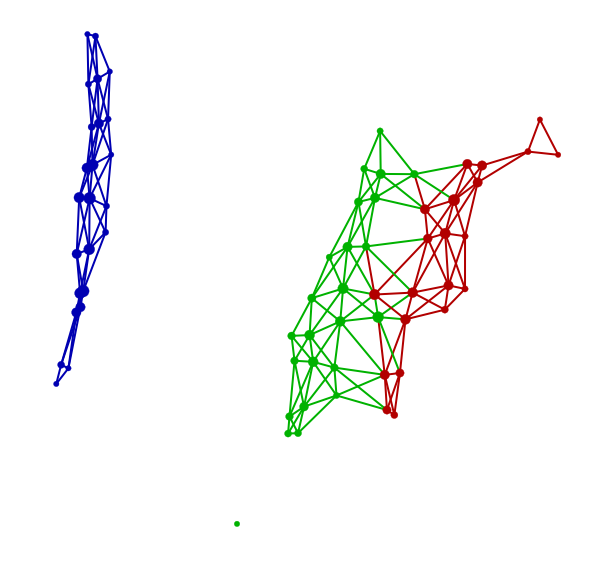

In [9]:
# 必要なモジュール
from sklearn.datasets import load_iris
from renom_tda.topology import Topology
from renom_tda.lens import PCA
# データのインポート
iris = load_iris()
data = iris.data
target = iris.target
# インスタンス作成
topology = Topology()
# データのロード
topology.load_data(data)
# ポイントクラウドの作成
metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
# 位相空間へマッピング
topology.map(resolution=15, overlap=0.5, eps=0.1, min_samples=3)
# トポロジーの色付け
topology.color(target, color_method="mode", color_type="rgb")
# トポロジーの表示
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)